In [12]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="2"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

In [13]:
npz_directory = 'npz_directory/'
npz_name = 'Celltypedetectionn.npz'
npz_val_name = 'Celltypedetectionvalval.npz'

#Read and Write the h5 file, directory location and name
model_dir =  'oneat_models/'
model_name = 'Celltypedetector.h5'

In [14]:
static_categories_json = model_dir + 'Celltypecategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'Celltypecord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = False
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stage_number = 3
last_conv_factor = 4

In [15]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, stride = last_conv_factor,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate,stage_number = stage_number, last_conv_factor = last_conv_factor,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=5, categories=6, depth=29, epochs=250, gridx=1, gridy=1, imagex=64, imagey=64, key_categories={'Normal': 0, 'Division': 1, 'Apoptosis': 2, 'MacroCheate': 3, 'NonMatureP1': 4, 'MatureP1': 5}, key_cord={'x': 0, 'y': 1, 'h': 2, 'w': 3, 'c': 4}, last_conv_factor=4, learning_rate=1e-06, mid_kernel=3, model_name='CellNetd29s3resf32.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/FinalONEATTraining/StaticBin2Data/', npz_name='Staticbin2V1.npz', npz_val_name='Staticbin2V1Val.npz', residual=True, show=True, stage_number=3, start_kernel=7, startfilter=32, stride=4, yolo_v0=False)


number of  images:	 25817
image size (2D):		 (64, 64)
axes:				 SYXC
channels in / out:		 1
number of  images:	 1359
image size (2D):		 (64, 64)
axes:				 SYXC
channels in / out:		 1
(25817, 1, 1, 11) 1
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_69 (Conv2D)              (None, None, None, 3 1600        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_57 (BatchNo (None, None, None, 3 128         conv2d_69[0][0]                  
_______________________________________________________________________________________

Train on 25817 samples, validate on 1359 samples
Epoch 1/250
25817/25817 [==============================] - 1643s 64ms/step - loss: 2.8973 - accuracy: 0.0817 - val_loss: 2.2063 - val_accuracy: 0.2355

Epoch 00001: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/CellNetBinning2Models/CellNetd29s3resf32.h5
{'val_loss': 2.2063456132536516, 'val_accuracy': 0.23546725511550903, 'loss': 2.89726507752844, 'accuracy': 0.081690356, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

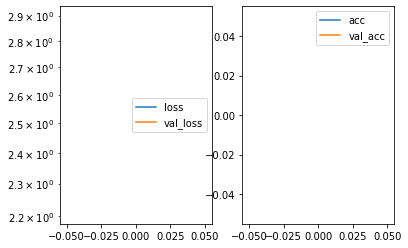

Predicted cell: Division Probability: [[0.51488054]]
True Cell type: Division
x [[0.36900467]]
True positional value x 0.5
y [[0.6168943]]
True positional value y 0.5
h [[0.60097075]]
True positional value h 0.21875
w [[0.517544]]
True positional value w 0.234375
c [[0.4078166]]
True positional value c 1.0


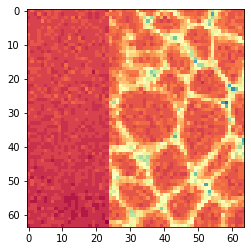

Epoch 2/250
25817/25817 [==============================] - 1645s 64ms/step - loss: 2.0134 - accuracy: 0.7612 - val_loss: 2.0474 - val_accuracy: 0.7513

Epoch 00002: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/CellNetBinning2Models/CellNetd29s3resf32.h5
{'val_loss': 2.0473979605393344, 'val_accuracy': 0.7512876987457275, 'loss': 2.013439372936272, 'accuracy': 0.76116514, 'lr': 1e-06}


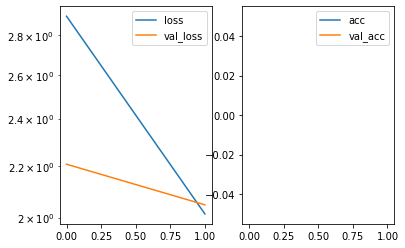

Predicted cell: Division Probability: [[0.7452989]]
True Cell type: Division
x [[0.59478223]]
True positional value x 0.5
y [[0.40107197]]
True positional value y 0.5
h [[0.66716856]]
True positional value h 0.25
w [[0.58454853]]
True positional value w 0.28125
c [[0.28821155]]
True positional value c 1.0


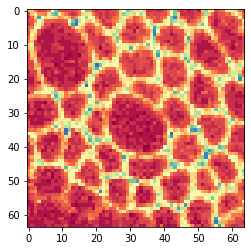

Epoch 3/250
25817/25817 [==============================] - 1648s 64ms/step - loss: 1.9741 - accuracy: 0.7792 - val_loss: 2.0270 - val_accuracy: 0.7322

Epoch 00003: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/CellNetBinning2Models/CellNetd29s3resf32.h5
{'val_loss': 2.027007034370529, 'val_accuracy': 0.732155978679657, 'loss': 1.9741023592877436, 'accuracy': 0.7792152, 'lr': 1e-06}


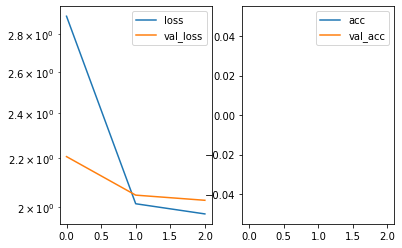

Predicted cell: Division Probability: [[0.6761847]]
True Cell type: MatureP1
x [[0.543362]]
True positional value x 0.5
y [[0.5534336]]
True positional value y 0.5
h [[0.6515502]]
True positional value h 0.375
w [[0.6495763]]
True positional value w 0.34375
c [[0.47478437]]
True positional value c 1.0


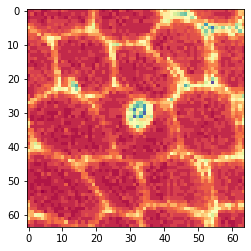

Epoch 4/250
25817/25817 [==============================] - 1647s 64ms/step - loss: 1.9535 - accuracy: 0.7578 - val_loss: 2.0146 - val_accuracy: 0.7314

Epoch 00004: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/CellNetBinning2Models/CellNetd29s3resf32.h5
{'val_loss': 2.0146199020942928, 'val_accuracy': 0.7314201593399048, 'loss': 1.953532746405468, 'accuracy': 0.75783396, 'lr': 1e-06}


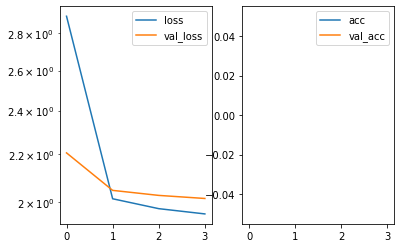

Predicted cell: Division Probability: [[0.8734151]]
True Cell type: Division
x [[0.488323]]
True positional value x 0.5
y [[0.578757]]
True positional value y 0.5
h [[0.40130186]]
True positional value h 0.28125
w [[0.48361757]]
True positional value w 0.328125
c [[0.40974241]]
True positional value c 1.0


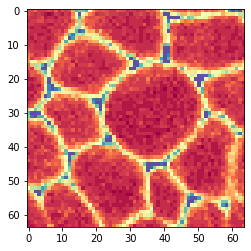

Epoch 5/250
25817/25817 [==============================] - 1656s 64ms/step - loss: 1.9427 - accuracy: 0.7605 - val_loss: 2.0056 - val_accuracy: 0.7439

Epoch 00005: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/CellNetBinning2Models/CellNetd29s3resf32.h5
{'val_loss': 2.005595168705983, 'val_accuracy': 0.743929386138916, 'loss': 1.9426521920823532, 'accuracy': 0.76050663, 'lr': 1e-06}


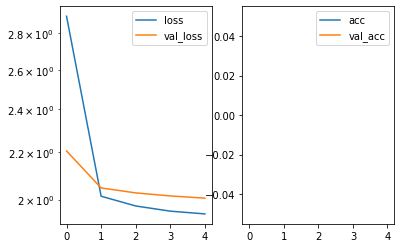

Predicted cell: Division Probability: [[0.48576692]]
True Cell type: Division
x [[0.8743055]]
True positional value x 0.5
y [[0.17779708]]
True positional value y 0.5
h [[0.8271805]]
True positional value h 0.203125
w [[0.45763525]]
True positional value w 0.234375
c [[0.09440923]]
True positional value c 1.0


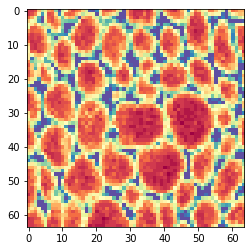

Epoch 6/250
25817/25817 [==============================] - 1650s 64ms/step - loss: 1.9334 - accuracy: 0.7667 - val_loss: 1.9970 - val_accuracy: 0.7483

Epoch 00006: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/CellNetBinning2Models/CellNetd29s3resf32.h5
{'val_loss': 1.9970014870736947, 'val_accuracy': 0.748344361782074, 'loss': 1.9333762046872183, 'accuracy': 0.7667041, 'lr': 1e-06}


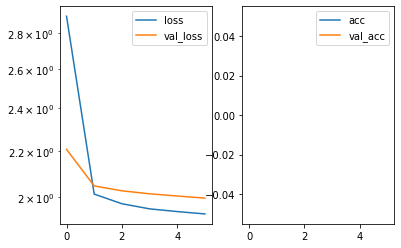

Predicted cell: Division Probability: [[0.7584104]]
True Cell type: Division
x [[0.29589126]]
True positional value x 0.5
y [[0.36490765]]
True positional value y 0.5
h [[0.5404627]]
True positional value h 0.40625
w [[0.5961816]]
True positional value w 0.34375
c [[0.41864687]]
True positional value c 1.0


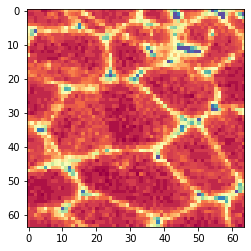

Epoch 7/250
25817/25817 [==============================] - 1657s 64ms/step - loss: 1.9248 - accuracy: 0.7703 - val_loss: 1.9879 - val_accuracy: 0.7535

Epoch 00007: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/CellNetBinning2Models/CellNetd29s3resf32.h5
{'val_loss': 1.9878702754041042, 'val_accuracy': 0.7534952163696289, 'loss': 1.9247840835616208, 'accuracy': 0.77026767, 'lr': 1e-06}


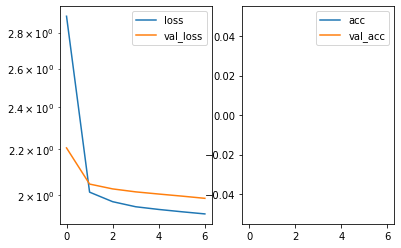

Predicted cell: Division Probability: [[0.9121479]]
True Cell type: Division
x [[0.6417692]]
True positional value x 0.5
y [[0.55886]]
True positional value y 0.5
h [[0.71480876]]
True positional value h 0.234375
w [[0.6389273]]
True positional value w 0.453125
c [[0.33688983]]
True positional value c 1.0


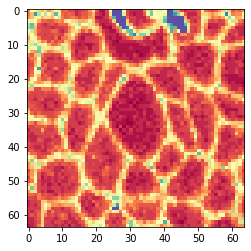

Epoch 8/250
25817/25817 [==============================] - 1654s 64ms/step - loss: 1.9154 - accuracy: 0.7707 - val_loss: 1.9792 - val_accuracy: 0.7616

Epoch 00008: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/CellNetBinning2Models/CellNetd29s3resf32.h5
{'val_loss': 1.9791978790621445, 'val_accuracy': 0.7615894079208374, 'loss': 1.915385389316921, 'accuracy': 0.77073246, 'lr': 1e-06}


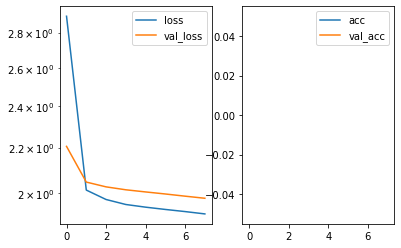

Predicted cell: Division Probability: [[0.7943683]]
True Cell type: MatureP1
x [[0.51714957]]
True positional value x 0.5
y [[0.42389134]]
True positional value y 0.5
h [[0.79077965]]
True positional value h 0.296875
w [[0.5668389]]
True positional value w 0.265625
c [[0.49016973]]
True positional value c 1.0


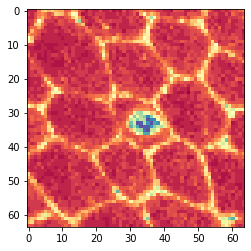

Epoch 9/250
20700/25817 [=======================>......] - ETA: 5:20 - loss: 1.9112 - accuracy: 0.7751

KeyboardInterrupt: 

In [16]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
